# CS273A Homework 4 

## Due: Monday November 4th, 2024 (11:59pm)

---
## Instructions


This homework (and subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it. 

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.
### Summary of Assignment: 100 total points
- Problem 1: A Small Neural Network (30 points)
    - Problem 1.1: Forward Pass (10 points)
    - Problem 1.2: Evaluate Loss (10 points)
    - Problem 1.3: Network Size (10 points)
- Problem 2: Neural Networks on MNIST (35 points)
    - Problem 2.1: Varying the Amount of Training Data (15 points)
    - Problem 2.3: Optimization Curves (10 points)
    - Problem 2.3: Tuning your Neural Network (10 points)
- Problem 3: Convolutional Networks (30 points)
    - Problem 3.1: Model structure (10 points)
    - Problem 3.2: Training (10 points)
    - Problem 3.3: Evaluation (5 points)
    - Problem 3.4: Comparing predictions (5 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any codes we give you below, except for those waiting for you to complete. This is to ensure your code has reproducible results and is important for grading.**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from IPython import display

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier     # scikit's MLP

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  
torch.manual_seed(seed);

---
## Problem 1: A Small Neural Network


Consider the small neural network given in the image below, which will classify a 3-dimensional feature vector $\mathbf{x}$ into one of three classes ($y = 0, 1, 2$):

You are given an input to this network $\mathbf{x}$, 
$$
\mathbf{x} = \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} = \begin{bmatrix} 1 & 3 & -2 \end{bmatrix}
$$
as well as weights $W$ for the hidden layer and weights $B$ for the output layer. 

$$
W = \begin{bmatrix} 
    w_{01} & w_{11} & w_{21} & w_{31} \\ 
    w_{02} & w_{12} & w_{22} & w_{32} \\
    \end{bmatrix} =
    \begin{bmatrix} 
    1 & -1 & 0 & 5 \\ 
    2 & 1 & 1 & 2 \\
    \end{bmatrix}
$$

$$
B = \begin{bmatrix} 
    \beta_{01} & \beta_{11} & \beta_{21} \\
    \beta_{02} & \beta_{12} & \beta_{22} \\
    \beta_{03} & \beta_{13} & \beta_{23} \\
    \end{bmatrix} =
    \begin{bmatrix}
    4 & -1 & 0 \\
    3 & 0 & 2 \\
    2 & 1 & 1
    \end{bmatrix}
$$

For example, $w_{12}$ is the weight connecting input $x_1$ to hidden node $h_2$; $w_{01}$ is the constant (bias) term for $h_1$, etc.

This network uses the ReLU activation function for the hidden layer, and uses the softmax activation function for the output layer. 

Answer the following questions about this network.

### Problem 1.1 (10 points): Forward Pass
- Given the inputs and weights above, compute the values of the hidden units $h_1, h_2$ and the outputs $f_0, f_1, f_2$. You should do this by hand, i.e. you should not write any code to do the calculation, but feel free to use a calculator to help you do the computations.
- You can optionally use $\LaTeX$ in your answer on the Jupyter notebook. Otherwise, write your answer on paper and include a picture of your answer in this notebook. In order to include an image in Jupyter notebook, save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. Alternatively, you may go to Edit --> Insert Image at the top menu to insert an image into a Markdown cell. **Double check that your image is visible in your PDF submission.**
- What class would the network predict for the input $\mathbf{x}$?

![](IMG_0380.jpg)
![](IMG_0381.jpg)

### Problem 1.2 (10 points): Evaluate Loss
Typically when we train neural networks for classification, we seek to minimize the log-loss function. Note that the output of the log-loss function is always nonnegative ($\geq 0$), but can be arbitrarily large (you should pause for a second and make sure you understand why this is true).

- Suppose the true label for the input $\mathbf{x}$ is $y = 1$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?
- Suppose instead that the true label for the input $\mathbf{x}$ is $y = 2$. What would be the value of our loss function based on the network's prediction for $\mathbf{x}$?

You are free to use numpy / Python to help you calculate this, but don't use any neural network libraries that will automatically calculate the loss for you.

In [40]:
# here are the f values 
f = [4, 7, 4]

# compute softmax 
exps = np.exp(f)
Z = np.sum(exps)
soft_max = exps / Z

# these are the "true" y values 
y1 = 1
y2 = 2

# now calculate the log loss 
loss_y1 = -np.log(soft_max[y1])
loss_y2 = -np.log(soft_max[y2])

print(f"softmax {soft_max}")
print(f"Log loss for y = 1: {loss_y1}")
print(f"Log loss for y = 2: {loss_y2}")




softmax [0.0452785 0.909443  0.0452785]
Log loss for y = 1: 0.09492295642096098
Log loss for y = 2: 3.094922956420961


### Problem 1.3 (10 points): Network Size
- Suppose we change our network so that there are $12$ hidden nodes instead of $2$. How many total parameters (weights and biases) are in our new network?


from input layer to hidden layer: 
2 nodes = 6 weights = 3 weights / node so 3 * 12 = 36 weights plus 12 constants (bias) so 36 + 12 = 48

from hidden layer to output layer: 
hidden nodes = 12 * number of outputs = 3 so 12 * 3 = 36 weights plus 3 constant (bias) so 36 + 3 = 39 

48 + 39 = 87 total parameters in the network

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

## Problem 2: Neural Networks on MNIST

In this part of the assignment, you will get some hands-on experience working with neural networks. We will be using the scikit-learn implementation of a multi-layer perceptron (MLP). See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for the corresponding documentation. Although there are specialized Python libraries for neural networks, like [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/), in this problem we'll just use scikit-learn since you're already familiar with it.

### Problem 2.0: Setting up the Data
First, we'll load our MNIST dataset and split it into a training set and a testing set. Here you are given code that does this for you, and you only need to run it.

We will use the scikit-learn class `StandardScaler` to standardize both the training and testing features. Notice that we **only** fit the `StandardScaler` on the training data, and *not* the testing data.

In [11]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# Convert labels to integer data type
y = y.astype(int)

In [12]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)

In [13]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)     # We can forget about the original values & work
X_te = scaler.transform(X_te)     #  just with the transformed values from here

### Problem 2.1: Varying the amount of training data (15 points)
One reason that neural networks have become popular in recent years is that, for many problems, we now have access to very large datasets. Since neural networks are very flexible models, they are often able to take advantage of these large datasets in order to achieve high levels of accuracy. In this problem, you will vary the amount of training data available to a neural network and see what effect this has on the model's performance.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD) and a constant learning rate of $0.001$
- Use a batch size of 256
- **Make sure to set `random_state=seed`.**

Your task is to implement the following:
- Train an MLP model (with the above hyperparameter settings) using the first `m_tr` feature vectors in `X_tr`, where `m_tr = [100, 1000, 5000, 10000, 20000, 50000, 63000]`. You should use the `MLPClassifier` class from scikit-learn in your implementation.
- Create a plot of the training error and testing error for your MLP model as a function of the number of training data points.  For comparison, also plot the training and test error rates we found when we trained a logistic regression model on MNIST (these values are provided below). Again, be sure to include an x-label, y-label, and legend in your plot and use a log-scale on the x-axis.
- Give a short (one or two sentences) description of what you see in your plot.   Do you think that more data (beyond these 63000 examples) would continue to improve the model's performance?

**Note** that training a neural network with a lot of data can be **a slow process**. Hence, you should be careful to implement your code such that it runs in a reasonable amount of time. One recommendation is to test your code using only a small subset of the given `m_tr` values, and only run your code with the larger values of `m_tr` once you are certain your code is working. (For reference, it took about 20 minutes to train all models on a quad-core desktop with no GPU.)

In [22]:
#import time         # helpful if you want to track execution time
#tic = time.time()

train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 63000]

tr_err_mlp = []
te_err_mlp = []

for m_tr in train_sizes:
    ### YOUR CODE STARTS HERE

    X_train_subset = X_tr[:m_tr]  
    y_train_subset = y_tr[:m_tr]

    # first define the MLP 
    model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', alpha=0.001, batch_size=256, random_state=seed)

    # now we want to fit it to the subset of train data 
    model.fit(X_train_subset, y_train_subset)

    # then we can predict on subset of train data and test data 
    y_pred_train = model.predict(X_train_subset)
    y_pred_test = model.predict(X_te)

    # then compute the error
    error_rate_train = np.mean(y_train_subset != y_pred_train)
    error_rate_test = np.mean(y_te != y_pred_test)

    print(f"error train: {error_rate_train}")
    print(f"error test: {error_rate_test}")

    # add to corresponding arrays - used to plot later 
    tr_err_mlp.append(error_rate_train)
    te_err_mlp.append(error_rate_test)

    # print(f'Total elapsed time: {time.time()-tic}')
    
    ### YOUR CODE ENDS HERE

error train: 0.0
error test: 0.4072857142857143
error train: 0.019
error test: 0.16071428571428573
error train: 0.0146
error test: 0.08914285714285715
error train: 0.0116
error test: 0.06814285714285714
error train: 0.00925
error test: 0.05085714285714286
error train: 0.0073
error test: 0.03528571428571429
error train: 0.007238095238095238
error test: 0.03257142857142857


In [9]:
# When plotting, use these (rounded) values from the similar logistic regression problem solution:
tr_err_lr = np.array([0.   , 0.   , 0.   , 0.   , 0.024, 0.053, 0.057])
te_err_lr = np.array([0.318, 0.149, 0.142, 0.137, 0.119, 0.087, 0.083])

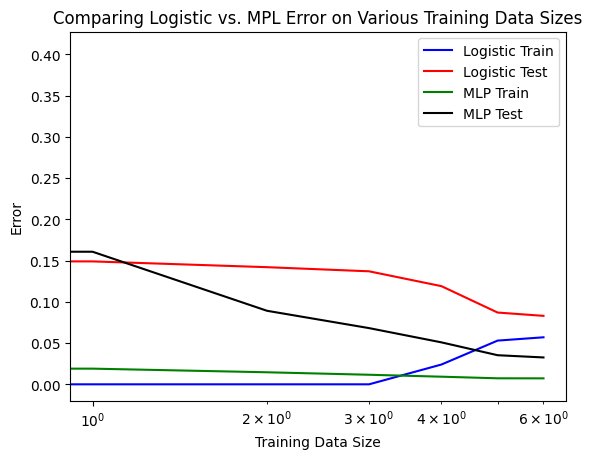

In [23]:
## YOUR CODE HERE (PLOTTING)

plt.semilogx(tr_err_lr, color='blue', label='Logistic Train')
plt.semilogx(te_err_lr, color='red', label='Logistic Test')
plt.semilogx(tr_err_mlp, color='green', label='MLP Train')
plt.semilogx(te_err_mlp, color='black', label='MLP Test')

plt.ylabel("Error")
plt.xlabel("Training Data Size")
plt.title("Comparing Logistic vs. MPL Error on Various Training Data Sizes")

plt.legend(); 

in this plot we can see that in both Logistic Regression and MLP, both training and test error start to become closer together as the training data size increases. but there is a larger error gap when using logistic regression as compared to MLP. it should also be noted that when using MLP, train error remains constant for all data sizes. With more data, i think the gap in train and test error would difinetly reduce as when we have more training data, the model would be able to generalize better as it has more examples to go off of. 

---
### Problem 2.2: Optimization Curves (10 points)

One hyperparameter that can have a significant effect on the optimization of your model, and thus its performance, is the learning rate, which controls the step size in (stochastic) gradient descent. In this problem you will vary the learning rate to see what effect this has on how quickly training converges as well as the effect on the performance of your model.

In this problem, you should use the following settings for your network:
- A single hidden layer with $64$ hidden nodes
- Use the ReLU activation function
- Train the network using stochastic gradient descent (SGD)
- Use a batch size of 256
- Set `n_iter_no_change=100` and `max_iter=100`. This ensures that all of your networks in this problem will train for 100 epochs (an *epoch* is one full pass over the training data).
- Make sure to set `random_state=seed`.

Your task is to:
- Train a neural network with the above settings, but vary the learning rate in `lr = [0.0005, 0.001, 0.005, 0.01]`.
- Create a plot showing the training loss as a function of the training epoch (i.e. the x-axis corresponds to training iterations) for each learning rate above. You should have a single plot with four curves. Make sure to include an x-label, a y-label, and a legend in your plot. (Hint: `MLPClassifier` has an attribute `loss_curve_` that you likely find useful.)
- Include a short description of what you see in your plot.

**Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. In the following cell, you are provided a few lines of code that will create a small training set (with the first 10,000 images in `X_tr`) and a validation set (with the second 10,000 images in `X_tr`). You will use the validation later in Problem 3.3. 

In [ ]:
# Create a smaller training set with the first 10,000 images in X_tr
#   along with a validation set from images 10,000 - 20,000 in X_tr

X_val = X_tr[10000:20000] # Validation set
y_val = y_tr[10000:20000]

X_tr = X_tr[:10000]       # From here on, we will only use these smaller sets,
y_tr = y_tr[:10000]       #  so it's OK to discard the rest of the data

Loss for learning rate 0.0005: [np.float64(1.1319116602105341), np.float64(0.4981253384960117), np.float64(0.3846889851206363), np.float64(0.33042630414570384), np.float64(0.2968687935555659), np.float64(0.27335595970397636), np.float64(0.2553804315302129), np.float64(0.24100119212349488), np.float64(0.22897571137525635), np.float64(0.218757707840495), np.float64(0.20992019583516303), np.float64(0.20213241502307647), np.float64(0.19515425513618195), np.float64(0.18885480412171507), np.float64(0.1831568245281142), np.float64(0.1778567636833961), np.float64(0.1729889120964901), np.float64(0.16850828119540193), np.float64(0.1642990947598397), np.float64(0.16039828263189745), np.float64(0.15676604803902375), np.float64(0.15324215309940128), np.float64(0.15000045993116634), np.float64(0.14689758583488668), np.float64(0.1439444905003558), np.float64(0.14117314297046), np.float64(0.13849007901799668), np.float64(0.1359538212620022), np.float64(0.1335552350566344), np.float64(0.131250156926262

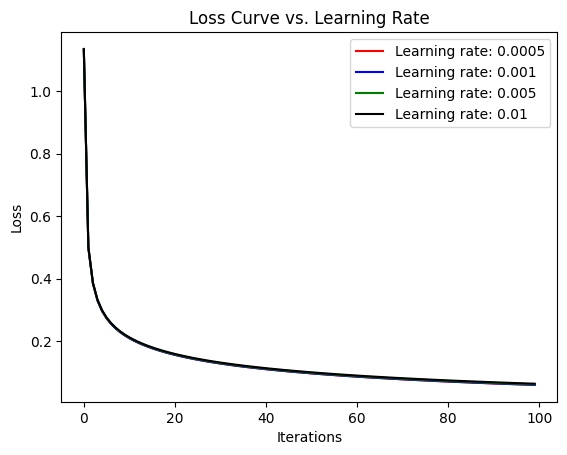

In [33]:
learning_rates = [0.0005, 0.001, 0.005, 0.01]

err_curves = []
colors = ['red', 'blue', 'green', 'black']

for lr in learning_rates:
    ### YOUR CODE STARTS HERE

    # first need to create the the MLP model and set alpha to lr 
    model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', batch_size=256, 
                          alpha=lr, n_iter_no_change=100, max_iter=100, random_state=seed)

    # then fit to the training data 
    model.fit(X_tr, y_tr)

    # then get the loss curve 
    loss = model.loss_curve_
    print(f"Loss for learning rate {lr}: {loss}")
    err_curves.append(loss)

# then plot these loss curves on the same plot 
for i, loss in enumerate(err_curves):
    plt.plot(loss, color=colors[i], label=f'Learning rate: {learning_rates[i]}')

# set labels 
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve vs. Learning Rate")
plt.legend(); 
plt.show();

    ### YOUR CODE ENDS HERE

### Problem 2.3: Tuning a Neural Network (10 points)

As you saw in Problem 3.2, there are many hyperparameters of a neural network that can possibly be tuned in order to try to maximize the accuracy of your model. For the final problem of this assignment, it is your job to tune these hyperparameters.

For example, some hyperparameters you might choose to tune are:
- Learning rate
- Depth/width of the hidden layers
- Regularization strength
- Activation functions
- Batch size in stochastic optimization
- etc.

To do this, you should train a network on the training data `X_tr` and evaluate its performance on the validation set `X_val` -- your goal is to achieve the highest possible accuracy on `X_val` by changing the network hyperparameters. **Important: To make your code run faster, you should train all of your networks in this problem on only the first 10,000 images of `X_tr`**. This was already set up for you in Problem 3.2.

Try to find settings that enable you to achieve an error rate smaller than 5% on the validation data. However, tuning neural networks can be difficult; if you cannot achieve this target error rate, be sure to try at least five different neural networks (corresponding to five different settings of the hyperparameters).

In your answer, include a table listing the different hyperparameters that you tried, along with the resulting accuracy on the training and validation sets `X_tr` and `X_val`. Indicate which of these hyperparameter settings you would choose for your final model, and report the accuracy of this final model on the testing set `X_te`.

in class we leanred that the ReLu activation finction is far superior than all the others so i chose ReLu as my activation function in all 5 of my neural networks. 


## Problem 3: Torch and Convolutional Networks

In this problem, we will train a small convolutional neural network and compare it to the "standard" MLP model you built in Problem 2.  Since ``scikit`` does not support CNNs, we will implement a simple CNN model using ``torch``.

The ``torch`` library may take a while to install if it is not yet on your system.  It should be pre-installed on ICS Jupyter Hub (``hub.ics.uci.edu``) and Google CoLab, if you prefer to use those.

### Problem 3.0: Defining the CNN

First, we need to define a CNN model.  This is done for you; it consists of one convolutional layer, a pooling layer to down-sample the hidden nodes, and a standard fully-connected or linear layer.  It contains methods to calculate the 0/1 loss as well as the negative log-likelihood, and trains using the Adam variant of SGD.

It can (optionally) output a real-time plot of the training process at each epoch, if you would like to assess how it is doing.

In [35]:
import torch 
torch.set_default_dtype(torch.float64)

class myConvNet(object):
    def __init__(self):
        # Initialize parameters: assumes data size! 28x28 and 10 classes
        self.conv_ = torch.nn.Conv2d(1, 16, (5,5), stride=2)  # Be careful when declaring sizes;
        self.pool_ = torch.nn.MaxPool2d(3, stride=2)          # inconsistent sizes will give you
        self.lin_ = torch.nn.Linear(400,10)                   # hard-to-read error messages.
            
    def forward_(self,X):
        """Compute NN forward pass and output class probabilities (as tensor) """
        r1 = self.conv_(X)             # X is (m,1,28,28); R is (m,16,24,24)/2 = (m,16,12,12)
        h1 = torch.relu(r1)            #
        h1_pooled = self.pool_(h1)     # H1 is (m,16,12,12), so H1p is (m,16,10,10)/2 = (m,16,5,5)
        h1_flat = torch.nn.Flatten()(h1_pooled)  # and H1f is (m,400)
        r2 = self.lin_(h1_flat)
        f  = torch.softmax(r2,axis=1)  # Output is (m,10)
        return f 
        
    def parameters(self): 
        return list(self.conv_.parameters())+list(self.pool_.parameters())+list(self.lin_.parameters())
    
    def predict(self,X):
        """Compute NN class predictions (as array) """
        m,n = X.shape
        Xtorch = torch.tensor(X).reshape(m,1,int(np.sqrt(n)),int(np.sqrt(n)))
        return self.classes_[np.argmax(self.forward_(Xtorch).detach().numpy(),axis=1)]   # pick the most probable class

    def J01(self,X,y):   return (y != self.predict(X)).mean()
    def JNLL_(self,X,y): return -torch.log(self.forward_(X)[range(len(y)),y.astype(int)]).mean()

    def fit(self, X,y, batch_size=256, max_iter=100, learning_rate_init=.005, momentum=0.9, alpha=.001, plot=False):
        self.classes_ = np.unique(y)        
        m,n = X.shape
        Xtorch = torch.tensor(X).reshape(m,1,int(np.sqrt(n)),int(np.sqrt(n)))        
        self.loss01, self.lossNLL = [self.J01(X,y)], [float(self.JNLL_(Xtorch,y))]

        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate_init)
        for epoch in range(max_iter):                        # 1 epoch = pass through all data
            pi = np.random.permutation(m)                    # per epoch: permute data order
            for ii,i in enumerate(range(0,m,batch_size)):    # & split into mini-batches
                ivals = pi[i:i+batch_size]
                optimizer.zero_grad()                        # Reset the gradient computation
                Ji = self.JNLL_(Xtorch[ivals,:,:,:],y[ivals])
                Ji.backward()
                optimizer.step()
            self.loss01.append(self.J01(X,y))                # track 0/1 and NLL losses
            self.lossNLL.append(float(self.JNLL_(Xtorch,y)))
            
            if plot:                                         # optionally visualize progress
                display.clear_output(wait=True)
                plt.plot(range(epoch+2),self.loss01,'b-',range(epoch+2),self.lossNLL,'c-')
                plt.title(f'J01: {self.loss01[-1]}, NLL: {self.lossNLL[-1]}')
                plt.draw(); plt.pause(.01);

### Problem 3.1: CNN model structure (10 points)

How many (trainable) parameters are specified in the convolutional network? 
(If you like, you can count them -- you can access them through each trainable element, e.g.,
``myConvNet().conv_._parameters['weights']`` and ``..._parameters['bias']``).  List how many from each layer, and the total.

### Problem 3.2: Training the model (10 points)

Now train your model on ``X_tr``. (Note that this should now include only 10k data points.)  If you like you can plot while training to monitor its progress.  Train for 50 epochs, using a learning rate of .001.

(Note that my simple training process takes these arguments directly into ``fit``, rather than being part of the model properties as is typical in ``scikit``.)

### Problem 3.3: Evaluation and Discussion (5 points)

Evaluate your CNN model's training, validation, and test error.  Compare these to the values you got after optimizing your model's training process in Problem 2.3 (Tuning).  Why do you think these differences occur? (Note that your answer may depend on how well your model in P2.3 did, of course.)

### Problem 3.4: Comparing Predictions (5 points)

Consider the "somewhat ambiguous" data point ``X_val[592]``.  Display the data point (it will look a bit weird since it is already normalized).  Then, use your trained ``MLPClassifier`` model to predict the class probabilities.  If there are other classes with non-negligible probability, are they plausible?  Similarly, find the class probabilities predicted by your CNN model.  Compare the two models' uncertainty.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

i did not collaborate with anyone during the completion of this assignment. 